### Exploratory Data Analysis
* Przed rozpoczęciem tworzenia modelu ML zrealizowana została prosta analiza i 'preprocessing' posiadanego zbioru danych 'diamonds.csv'.
* Wynikiem przetwarzania jest plik 'diamonds_cleaned.csv', który posłuży jako input dla modelu ML.
* Szczegółowe informacje dotyczące pochodzenia źródła danych i jego atrybutów opisane zostały w pliku README.md.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
diamond_data = pd.read_csv('data/diamonds.csv')

In [153]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [154]:
diamond_data.shape


(53940, 11)

In [155]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [156]:
diamond_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [157]:
# drop unnecessary index row
diamond_data = diamond_data.drop(["Unnamed: 0"], axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [158]:
# drop 0 in columns x, y or z - no need for two-dimensional diamonds
diamond_data[['x','y','z']] = diamond_data[['x','y','z']].replace(0,np.NaN)
diamond_data.dropna(inplace=True)
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [159]:
# make a new attribute volume instead of x, y, z
diamond_data['volume'] = diamond_data['x']*diamond_data['y']*diamond_data['z']
diamond_data.drop(['x', 'y', 'z'], axis=1, inplace=True)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


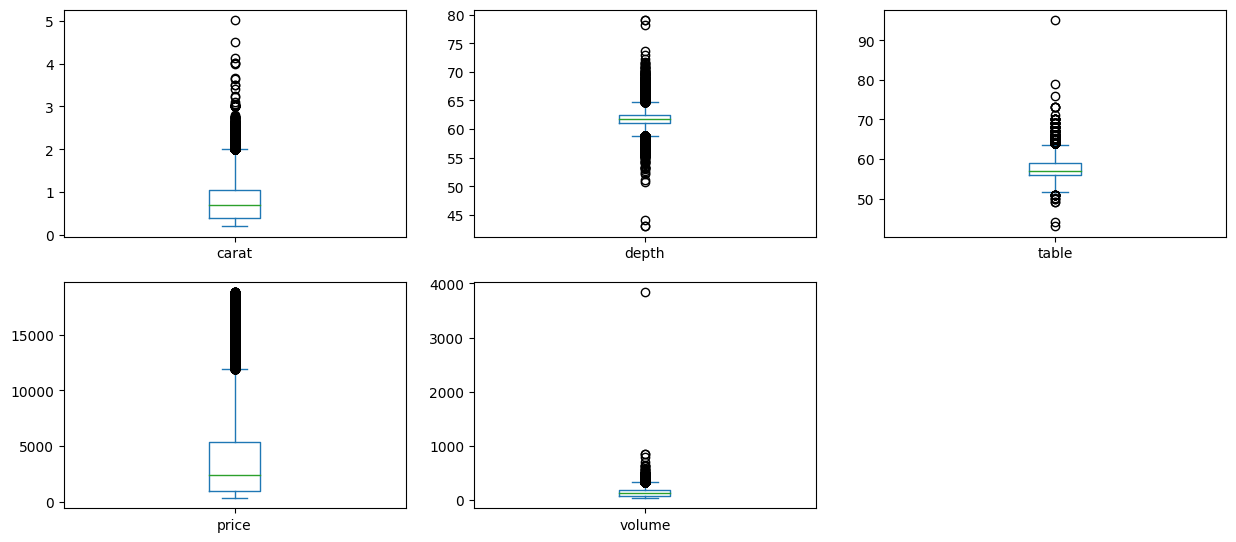

In [160]:
# outlier analysis
diamond_data.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [161]:
# remove outliers outside of 1.5 IQR
def outliers(var):
    a = []
    q1 = diamond_data[var].quantile(.25)
    q2 = diamond_data[var].quantile(.5)
    q3 = diamond_data[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in diamond_data[var]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in diamond_data.select_dtypes(exclude='object').columns:
    diamond_data[col] = outliers(col)

# didn't meet criteria
diamond_data.isnull().sum()

carat      1883
cut           0
color         0
clarity       0
depth      2543
table       604
price      3532
volume     1323
dtype: int64

In [162]:
# drop outliers
diamond_data.dropna(inplace=True)
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64

In [163]:
diamond_data.shape

(47520, 8)

In [164]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326.0,34.505856
3,0.29,Premium,I,VS2,62.4,58.0,334.0,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335.0,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336.0,38.693952


In [165]:
# analysis of numerical and categorical data
numerical_cols = diamond_data.select_dtypes(include=np.number).columns.to_list()
categorical_cols = diamond_data.select_dtypes(exclude=np.number).columns.to_list()

In [166]:
numerical_cols

['carat', 'depth', 'table', 'price', 'volume']

In [167]:
categorical_cols

['cut', 'color', 'clarity']

In [168]:
diamond_data['cut'].value_counts()


Ideal        20338
Premium      12113
Very Good    10994
Good          3745
Fair           330
Name: cut, dtype: int64

In [169]:
diamond_data['color'].value_counts()

G    10081
E     8910
F     8465
H     7175
D     6195
I     4460
J     2234
Name: color, dtype: int64

In [170]:
diamond_data['clarity'].value_counts()

SI1     11553
VS2     10928
SI2      7399
VS1      7373
VVS2     4683
VVS1     3463
IF       1650
I1        471
Name: clarity, dtype: int64

In [171]:
# label encoding categorical data
for col in categorical_cols:
    print(f"{col} unique values: {diamond_data[col].unique()}")

cut unique values: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color unique values: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity unique values: ['SI2' 'SI1' 'VS2' 'VVS2' 'VVS1' 'VS1' 'I1' 'IF']


In [172]:
# label encoding map
dict_map = {"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4,
            'I1':1, 'SI1':1, 'SI2':1, 'VS1':2, 'VS2':2, 'VVS1':3, 'VVS2':3, "IF":4,
            'I':0,'J':0,'H':0,'G':0, 'E':1,'F':1,'D':1}

for col in categorical_cols:
    diamond_data[col] = diamond_data[col].map(dict_map)

In [173]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,1,1,61.5,55.0,326.0,38.202030
1,0.21,3,1,1,59.8,61.0,326.0,34.505856
3,0.29,3,0,2,62.4,58.0,334.0,46.724580
4,0.31,1,0,1,63.3,58.0,335.0,51.917250
5,0.24,2,0,3,62.8,57.0,336.0,38.693952


In [174]:
diamond_data['cut'].value_counts()

4    20338
3    12113
2    10994
1     3745
0      330
Name: cut, dtype: int64

In [175]:
diamond_data['color'].value_counts()


0    23950
1    23570
Name: color, dtype: int64

In [176]:
diamond_data['clarity'].value_counts()


1    19423
2    18301
3     8146
4     1650
Name: clarity, dtype: int64

In [177]:
# final dataset
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,1,1,61.5,55.0,326.0,38.202030
1,0.21,3,1,1,59.8,61.0,326.0,34.505856
3,0.29,3,0,2,62.4,58.0,334.0,46.724580
4,0.31,1,0,1,63.3,58.0,335.0,51.917250
5,0.24,2,0,3,62.8,57.0,336.0,38.693952


In [178]:
diamond_data.shape

(47520, 8)

In [179]:
diamond_data.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,0.708572,3.018182,0.496002,1.832134,61.786622,57.260208,3108.899242,115.477234
std,0.370887,1.018219,0.499989,0.831192,1.105860,2.021553,2748.672533,59.890497
min,0.200000,0.000000,0.000000,1.000000,58.800000,52.000000,326.000000,31.707984
25%,0.380000,2.000000,0.000000,1.000000,61.100000,56.000000,890.000000,61.675988
50%,0.600000,3.000000,0.000000,2.000000,61.900000,57.000000,2061.000000,99.107684
75%,1.010000,4.000000,1.000000,2.000000,62.500000,59.000000,4634.250000,163.427308
max,2.000000,4.000000,1.000000,4.000000,64.700000,63.500000,11883.000000,329.048384


In [180]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47520 non-null  float64
 1   cut      47520 non-null  int64  
 2   color    47520 non-null  int64  
 3   clarity  47520 non-null  int64  
 4   depth    47520 non-null  float64
 5   table    47520 non-null  float64
 6   price    47520 non-null  float64
 7   volume   47520 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 3.3 MB


In [181]:
# write to file
diamond_data.to_csv('data/diamonds_cleaned.csv', sep=',', encoding='utf-8')

# end of EDA